In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Ya se intentó con NO_normalizar 1 , 2 , 3

Con el 1 la gráfica no se comporta como quiero, la 2 se acerca más, la 3 es una recta

Cargando el modelo

In [2]:
model = tf.keras.models.load_model('NO_normalizar_4.h5')

In [44]:
files = [file for file in os.listdir('./parametros')]

param = pd.DataFrame()
for file in files:
  df = pd.read_csv('./parametros/'+file)
  param = pd.concat([param, df], axis= 0)

In [4]:
param

,Longitud de onda,Índice de absorción,Fracvol,Radio (nm),Espesor de la película (nm)
0,301,0.016685,1,10,100
1,302,0.016167,1,10,100
2,303,0.015703,1,10,100
3,304,0.015290,1,10,100
4,305,0.014916,1,10,100
...,...,...,...,...,...
19195,896,0.002255,1,9,120
19196,897,0.002257,1,9,120
19197,898,0.002258,1,9,120
19198,899,0.002260,1,9,120


Agarramos los primeros 600 de nuestro df porque eso es toda la gráfica

In [5]:
primeros_600 = df.head(600)
primeros_600

,Longitud de onda,Índice de absorción,Fracvol,Radio (nm),Espesor de la película (nm)
0,301,0.017537,1,10,120
1,302,0.017043,1,10,120
2,303,0.016599,1,10,120
3,304,0.016203,1,10,120
4,305,0.015845,1,10,120
...,...,...,...,...,...
595,896,0.002254,1,10,120
596,897,0.002256,1,10,120
597,898,0.002258,1,10,120
598,899,0.002259,1,10,120


Esta es la gráfica que la red intentará predecir

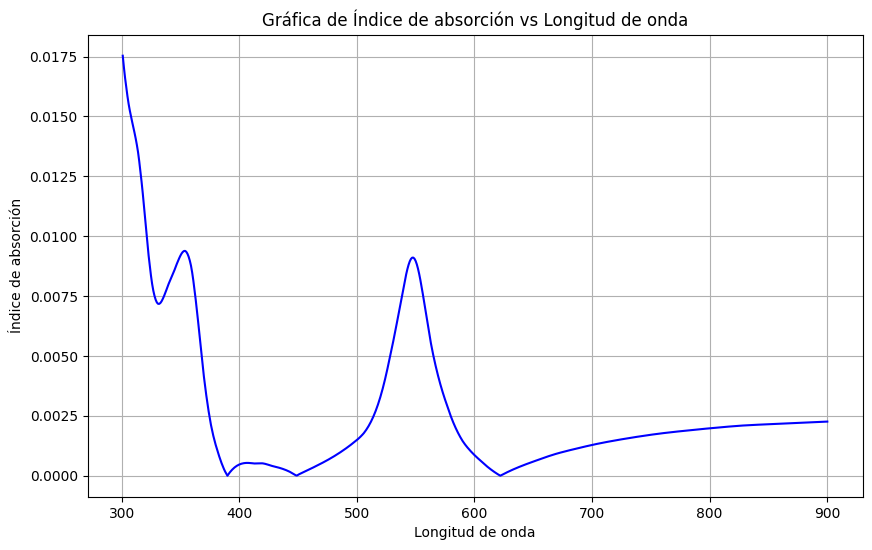

In [6]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = primeros_600[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda')
plt.grid(True)
plt.show()

Quitamos Índice de absorción para que la red haga su trabajo

In [7]:
new_data = primeros_600.drop('Índice de absorción', axis=1)

In [8]:
new_data = new_data.values
new_data

array([[301,   1,  10, 120],
       [302,   1,  10, 120],
       [303,   1,  10, 120],
       ...,
       [898,   1,  10, 120],
       [899,   1,  10, 120],
       [900,   1,  10, 120]], dtype=int64)

Normalizando los datos de entrada

In [9]:
predictions = model.predict(new_data)
predictions

19/19 [==============================] - 0s 974us/step


array([[0.01702991],
       [0.01676882],
       [0.0165054 ],
       [0.01624198],
       [0.01597856],
       [0.01571514],
       [0.01545797],
       [0.01520995],
       [0.01496192],
       [0.01471389],
       [0.01446587],
       [0.01421784],
       [0.01396982],
       [0.01372179],
       [0.01345215],
       [0.01306455],
       [0.01267696],
       [0.01228936],
       [0.01190177],
       [0.01152126],
       [0.01109285],
       [0.01064477],
       [0.01019322],
       [0.00974167],
       [0.00929013],
       [0.00881784],
       [0.00833003],
       [0.00795527],
       [0.00762483],
       [0.00760225],
       [0.00764369],
       [0.00768514],
       [0.00772658],
       [0.00776899],
       [0.00781848],
       [0.0078687 ],
       [0.00791893],
       [0.00796915],
       [0.00801937],
       [0.00806959],
       [0.00811982],
       [0.00817004],
       [0.00822026],
       [0.00827048],
       [0.0083207 ],
       [0.00837093],
       [0.00842115],
       [0.008

creando 2 dataframes para poderlos unir y que no sean np arrays

In [10]:
df1 = pd.DataFrame(new_data, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

juntando las predicciones con los valores anteriores

In [11]:
result_df = pd.concat([df1, df2], axis=1)
result_df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm),Índice de absorción
0,301,1,10,120,0.017030
1,302,1,10,120,0.016769
2,303,1,10,120,0.016505
3,304,1,10,120,0.016242
4,305,1,10,120,0.015979
...,...,...,...,...,...
595,896,1,10,120,0.002533
596,897,1,10,120,0.002536
597,898,1,10,120,0.002539
598,899,1,10,120,0.002543


# Graficando los valores que obtuvo la red

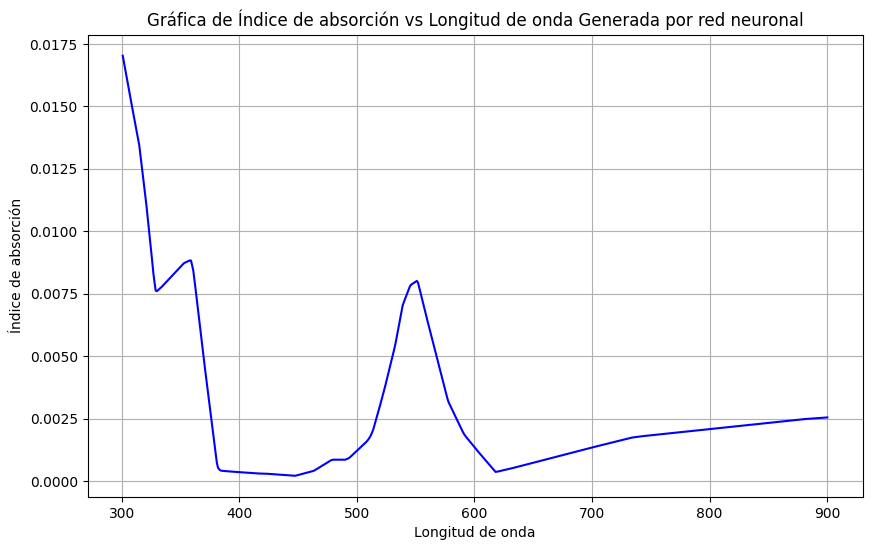

In [12]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

# Ahora a probar con todos los de radio

df tiene todos las graficas del radio

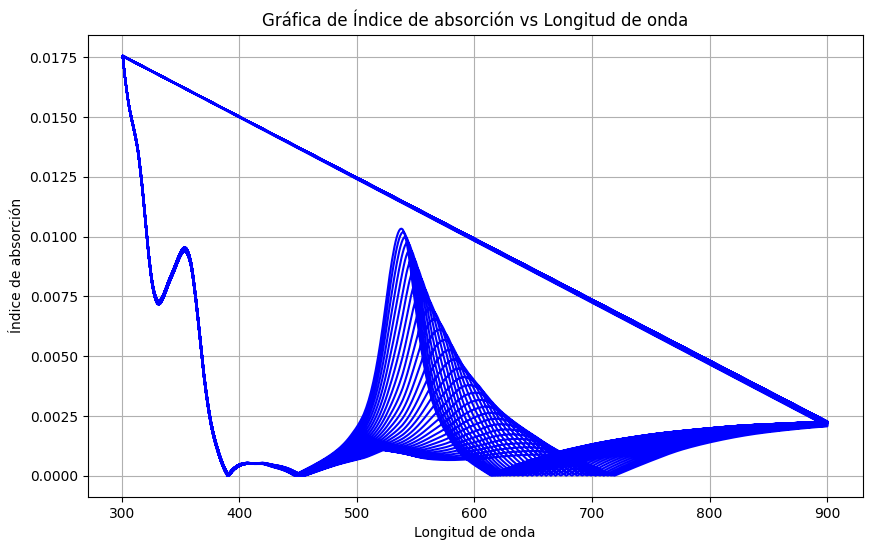

In [38]:
columnas_seleccionadas= ['Longitud de onda', 'Índice de absorción']
df_seleccionado = df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda')
plt.grid(True)
plt.show()

In [40]:
new_data = df.drop('Índice de absorción', axis=1)
new_data = new_data.values
predictions = model.predict(new_data)
df1 = pd.DataFrame(new_data, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

600/600 [==============================] - 1s 879us/step


In [41]:
result_df = pd.concat([df1, df2], axis=1)

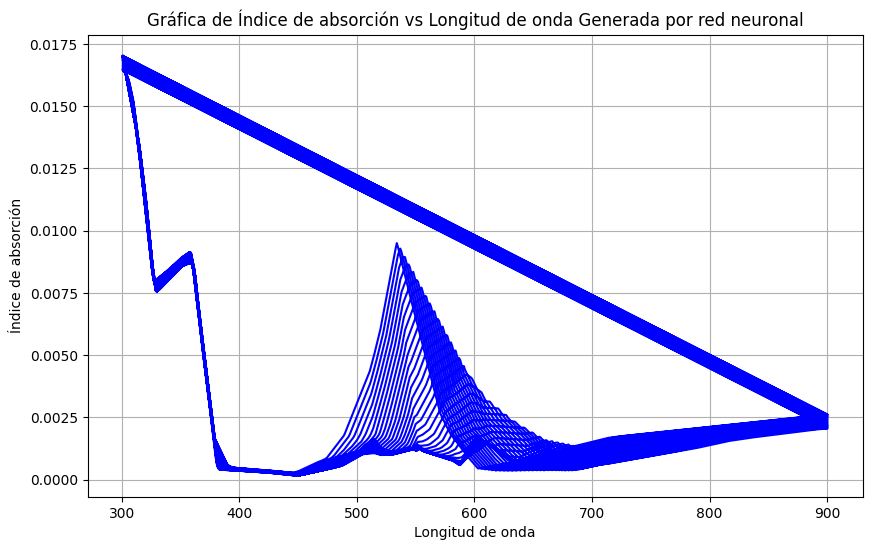

In [42]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()